In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [22]:
def carregarArquivo():
    df = pd.read_csv('../Sleep_health_and_lifestyle_dataset.csv')
    return df

In [23]:
def idadeMinMax(df):
    idadeMin = df['Age'].min()
    idadeMax = df['Age'].max()
    print(f"Idade mínima: {idadeMin}")
    print(f"Idade máxima: {idadeMax}")

In [24]:
def calcularCorrelacao(df):
    corr, _ = pearsonr(df['Age'], df['Sleep Duration'])
    print(f"Coeficiente de correlação: {corr:.2f}")

In [25]:
def regressaoLinear(df):
    x = df['Age'].values.reshape(-1, 1)
    y = df['Sleep Duration'].values
    modelo = LinearRegression()
    modelo.fit(x, y)
    a = modelo.intercept_
    b = modelo.coef_[0]
    print(f"Intercepto (a): {a:.2f}")
    print(f"Coeficiente (b): {b:.2f}")
    plt.scatter(df['Age'], df['Sleep Duration'], color='blue', label='Dados')
    plt.plot(df['Age'], modelo.predict(x), color='red', label='Linha de Regressão')
    plt.xlabel('Idade')
    plt.ylabel('Duração do Sono')
    plt.legend()
    plt.show()

In [26]:
def regressaoManual(df):
    somaX = 0
    somaY = 0
    somaXY = 0
    somaX2 = 0
    somaY2 = 0
    for i in range(len(df['Age'])):
        somaX += df['Age'][i]
        somaY += df['Sleep Duration'][i]
        somaXY += df['Age'][i] * df['Sleep Duration'][i]
        somaX2 += df['Age'][i] ** 2
        somaY2 += df['Sleep Duration'][i] ** 2
    tamanho = len(df['Age'])
    R = (tamanho * somaXY - somaX * somaY) / (tamanho * somaX2 - somaX**2) * (tamanho * somaY2 - somaY**2)**(1/2)
    a = (tamanho * somaXY - somaX * somaY) / (tamanho * somaX2 - (somaX ** 2))
    b = (somaY / tamanho) - (a * (somaX / tamanho))
    print(f"Coeficiente manual (a): {a:.2f}")
    print(f"Intercepto manual (b): {b:.2f}")
    y_pred = b + a * np.array(df['Age'])
    plt.scatter(df['Age'], df['Sleep Duration'], color='blue', label='Dados')
    plt.plot(df['Age'], y_pred, color='red', label='Linha de Regressão')
    plt.xlabel('Idade')
    plt.ylabel('Duração do Sono')
    plt.legend()
    plt.show()

Idade mínima: 27
Idade máxima: 59
Coeficiente de correlação: 0.34
Intercepto (a): 5.80
Coeficiente (b): 0.03


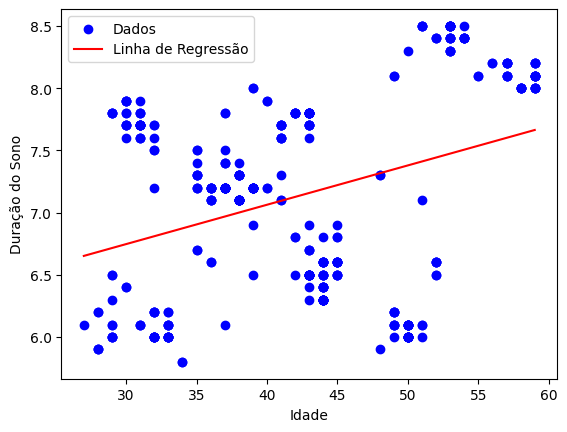

Coeficiente manual (a): 0.03
Intercepto manual (b): 5.80


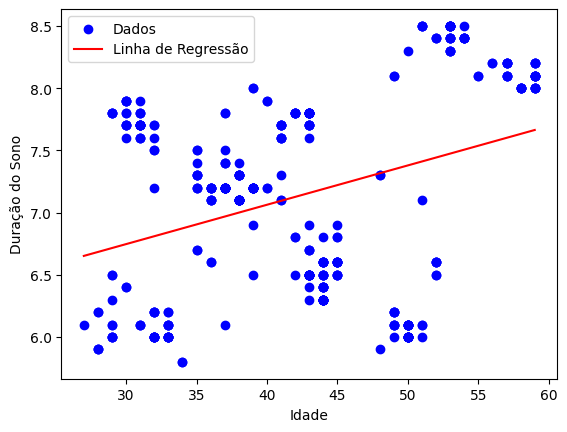

In [27]:
df = carregarArquivo()
idadeMinMax(df)
calcularCorrelacao(df)
regressaoLinear(df)
regressaoManual(df)